       System              Model       RMSE  R2 Score
0  Fixed-Time  Linear Regression  20.717399  0.997537
1  Fixed-Time   Ridge Regression  20.737959  0.997532
2  Fixed-Time   Lasso Regression  20.713999  0.997538
3  Fixed-Time      Decision Tree  27.555720  0.995643
4  Fixed-Time                KNN  34.781224  0.993058
5  Fixed-Time      Random Forest  22.319861  0.997141
6  Fixed-Time  Gradient Boosting  21.142174  0.997435
0    Adaptive  Linear Regression  19.645761  0.996570
1    Adaptive   Ridge Regression  19.664550  0.996563
2    Adaptive   Lasso Regression  19.643333  0.996571
3    Adaptive      Decision Tree  29.627920  0.992199
4    Adaptive                KNN  33.569847  0.989985
5    Adaptive      Random Forest  21.006410  0.996078
6    Adaptive  Gradient Boosting  20.246749  0.996357


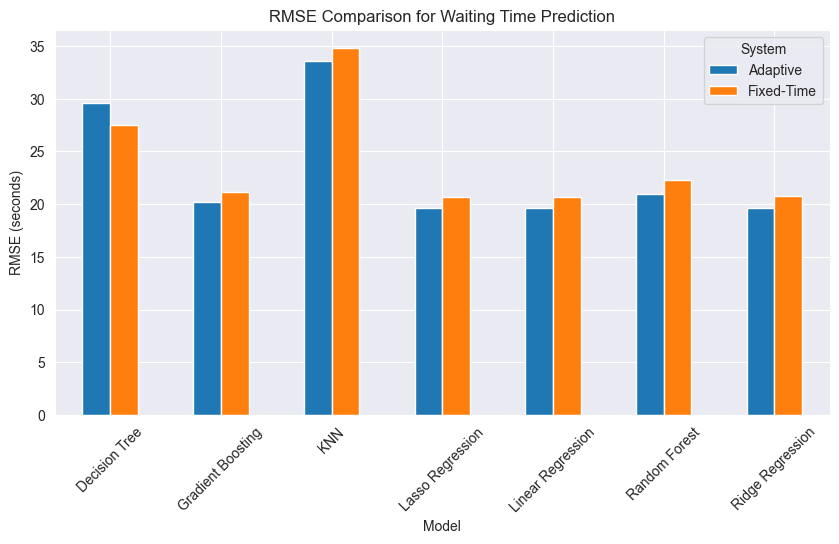

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


fixed = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_fixed.csv")
adaptive = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_adaptive.csv")

fixed["system"] = "Fixed-Time"
adaptive["system"] = "Adaptive"

target = "waiting_time"
features = ["route_length", "depart_time", "duration", "time_loss"]

def preprocess(df):
    X = df[features]
    y = df[target]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

def train_and_evaluate(df, system_name):
    X, y = preprocess(df)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=0.01),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "KNN": KNeighborsRegressor(n_neighbors=5),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)

        results.append({
            "System": system_name,
            "Model": name,
            "RMSE": rmse,
            "R2 Score": r2
        })

    return pd.DataFrame(results)

results_fixed = train_and_evaluate(fixed, "Fixed-Time")
results_adaptive = train_and_evaluate(adaptive, "Adaptive")

results = pd.concat([results_fixed, results_adaptive])
print(results)

results.pivot(index="Model", columns="System", values="RMSE").plot(
    kind="bar", figsize=(10,5)
)
plt.title("RMSE Comparison for Waiting Time Prediction")
plt.ylabel("RMSE (seconds)")
plt.xticks(rotation=45)
plt.show()
